# Analyzed Videos EDA

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import glob
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import seaborn as sns
import vizualisation as viz

2025-04-03 21:41:22.526318: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743684082.715203    6260 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743684082.768431    6260 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-03 21:41:23.289660: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
path_to_root = '/home/ben/projects/SaoPauloBrazilChapter_BrazilianSignLanguage/'

In [5]:
metadata = pd.read_csv(path_to_root + '/data/raw/combined/target_dataset_video_metadata.csv')

In [9]:
i = -1
metadata_row = metadata.iloc[i].copy()
metadata_row

filename        vagina_vl_6.mp4
label                       NaN
data_source                 NaN
frame_count                 389
fps                        60.0
duration_sec           6.483333
width                      1920
height                     1080
Name: 155, dtype: object

## Full Dataset Analysis Info

Load all the analysis info .jsons for the full dataset and combine into a dataframe

In [6]:
def nested_dict_to_df(nested_dict, prefix=''):
    flat_dict = {}
    
    def flatten(d, parent_key=''):
        for key, value in d.items():
            new_key = f"{parent_key}_{key}" if parent_key else key
            
            if isinstance(value, dict):
                flatten(value, new_key)
            else:
                flat_dict[new_key] = value
    
    flatten(nested_dict)
    return pd.DataFrame([flat_dict])

In [7]:
analysis_info_list = []

for i, row in metadata.iterrows():
    fn = row["filename"]
    analysis_info_path = os.path.join(
        path_to_root, 
        "data", 
        "interim", 
        "Analysis", 
        "28032025", 
        "individual_json", 
        fn.split(".")[0] + "_analysis_info.json"
    )
    if os.path.exists(analysis_info_path):
        with open(analysis_info_path, "r") as f:
            analysis_info_dict = json.load(f)
    analysis_info_df = nested_dict_to_df(analysis_info_dict)
    analysis_info_list.append(analysis_info_df)

In [24]:
analysis_info = pd.concat(analysis_info_list, axis = 0)
analysis_info['start_time'] = analysis_info['motion_analysis_start_frame'] / analysis_info['metadata_fps'].values
analysis_info['end_time'] = analysis_info['motion_analysis_end_frame'] / analysis_info['metadata_fps'].values

In [30]:
analysis_info[['start_time', 'end_time', 'motion_analysis_start_frame', 'motion_analysis_end_frame', 'metadata_duration_sec', 'metadata_fps', 'metadata_duration_sec', 'metadata_frame_count']]

,start_time,end_time,motion_analysis_start_frame,motion_analysis_end_frame,metadata_duration_sec,metadata_fps,metadata_duration_sec,metadata_frame_count
0,0.583333,3.166667,7,38,3.666667,12,3.666667,44
0,0.275862,2.448276,8,71,2.635967,29,2.635967,79
0,0.862069,3.620690,25,105,3.837167,29,3.837167,115
0,0.413793,4.758621,12,138,4.704700,29,4.704700,141
0,0.137931,9.896552,4,287,9.642967,29,9.642967,289
...,...,...,...,...,...,...,...,...
0,0.413793,1.965517,12,57,2.135467,29,2.135467,64
0,0.413793,3.206897,12,93,3.670333,29,3.670333,110
0,0.517241,5.068966,15,147,5.005000,29,5.005000,150
0,0.137931,7.344828,4,213,7.173833,29,7.173833,215


In [25]:
analysis_info['metadata_duration_sec'] = metadata['duration_sec'].values

In [26]:
analysis_info.head()

,metadata_filename,metadata_fps,metadata_width,metadata_height,metadata_duration_sec,metadata_frame_count,metadata_data_source,metadata_label,metadata_motion_detection_version,metadata_pose_detection_version,...,pose_analysis_landmark_measurements_top_head_to_shoulders_median,pose_analysis_landmark_measurements_top_head_to_shoulders_max,pose_analysis_landmark_measurements_nose_to_shoulders_mean,pose_analysis_landmark_measurements_nose_to_shoulders_median,pose_analysis_landmark_measurements_nose_to_shoulders_max,pose_analysis_landmark_measurements_chin_to_shoulders_mean,pose_analysis_landmark_measurements_chin_to_shoulders_median,pose_analysis_landmark_measurements_chin_to_shoulders_max,start_time,end_time
0,ajudar_ne_1.mp4,12,240,176,3.666667,44,ne,ajudar,versionA,versionA,...,0.401485,0.424468,0.281364,0.295888,0.323883,0.143076,0.154860,0.180421,0.583333,3.166667
0,ajudar_sb_2.mp4,29,1280,720,2.635967,79,sb,ajudar,versionA,versionA,...,0.284555,0.320690,0.192239,0.202928,0.254801,0.089284,0.094580,0.139206,0.275862,2.448276
0,ajudar_uf_3.mp4,29,480,270,3.837167,115,uf,ajudar,versionA,versionA,...,0.305301,0.319739,0.197913,0.208376,0.227967,0.100119,0.112404,0.123043,0.862069,3.620690
0,ajudar_vl_4.mp4,29,1920,1080,4.704700,141,vl,ajudar,versionA,versionA,...,0.309862,0.358281,0.223784,0.217937,0.272717,0.101667,0.094653,0.141479,0.413793,4.758621
0,ajudar_vl_5.mp4,29,1920,1080,9.642967,289,vl,ajudar,versionA,versionA,...,0.350756,0.402961,0.247273,0.245240,0.302809,0.113110,0.110576,0.160659,0.137931,9.896552


## Motion Detection Analysis

### Motion Detection Start and End Frame

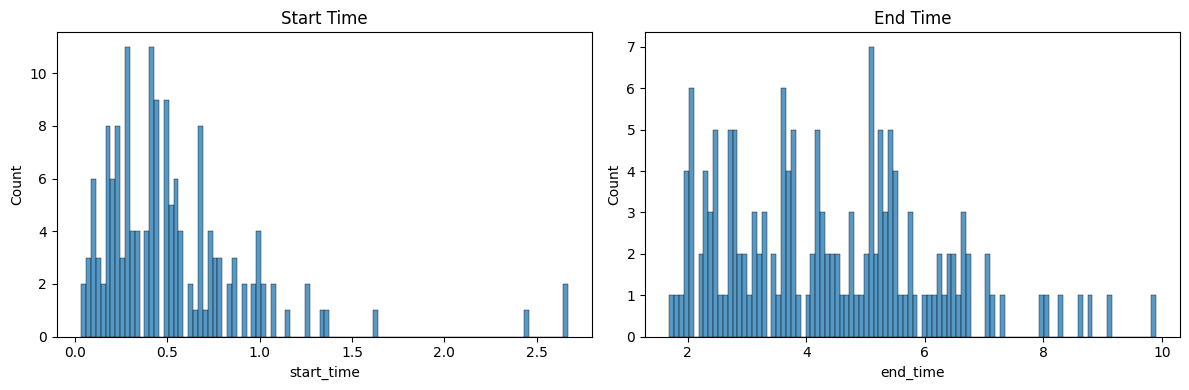

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(analysis_info.start_time, bins=100, ax=ax1)
ax1.set_title('Start Time')
sns.histplot(analysis_info.end_time, bins=100, ax=ax2) 
ax2.set_title('End Time')
plt.tight_layout()

<Axes: xlabel='motion_analysis_start_frame', ylabel='motion_analysis_end_frame'>

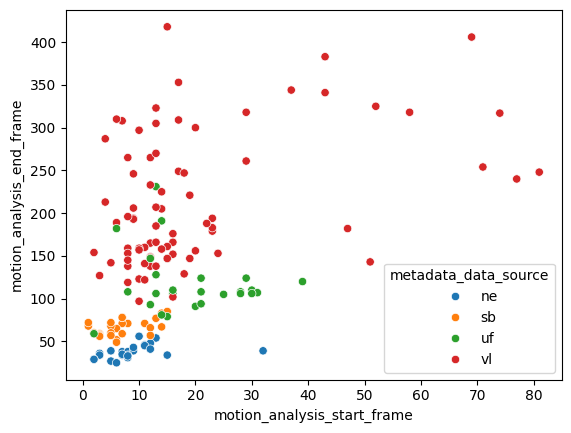

In [ ]:
sns.scatterplot(x = 'motion_analysis_start_frame', y = 'motion_analysis_end_frame', data = analysis_info, hue = 'metadata_data_source')

<Axes: xlabel='start_time', ylabel='end_time'>

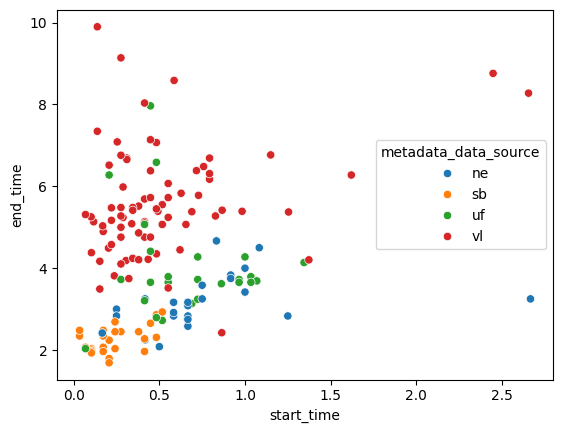

In [32]:
sns.scatterplot(x = 'start_time', y = 'end_time', data = analysis_info, hue = 'metadata_data_source')

### Motion Detection Duration

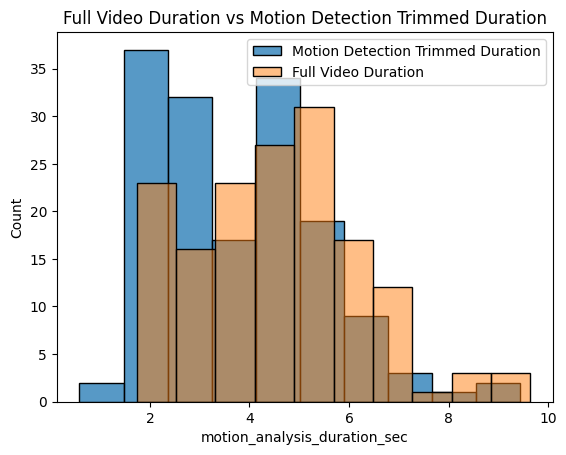

In [146]:
sns.histplot(data=analysis_info, x = 'motion_analysis_duration_sec')
sns.histplot(data=analysis_info, x = 'metadata_duration_sec', alpha = 0.5)
plt.title('Full Video Duration vs Motion Detection Trimmed Duration')
# legend
plt.legend([ 'Motion Detection Trimmed Duration','Full Video Duration',])
plt.show()


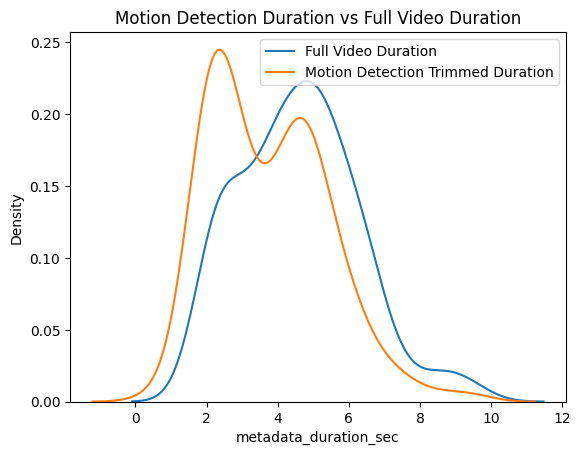

In [147]:
sns.kdeplot(data=analysis_info, x = 'metadata_duration_sec', )
sns.kdeplot(data=analysis_info, x = 'motion_analysis_duration_sec',)
plt.title('Motion Detection Duration vs Full Video Duration')
plt.legend(['Full Video Duration', 'Motion Detection Trimmed Duration'])

Text(0.5, 1.0, 'Full Video Duration - by data source')

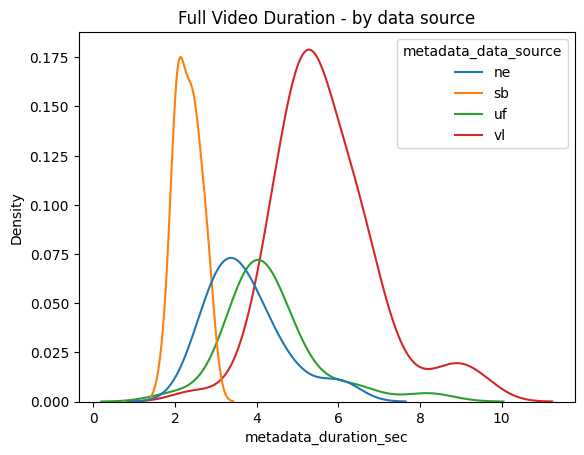

In [36]:
sns.kdeplot(data=analysis_info, x = 'metadata_duration_sec', hue = 'metadata_data_source')
plt.title('Full Video Duration - by data source')

Text(0.5, 1.0, 'Motion Detection Trimmed Duration - by data source')

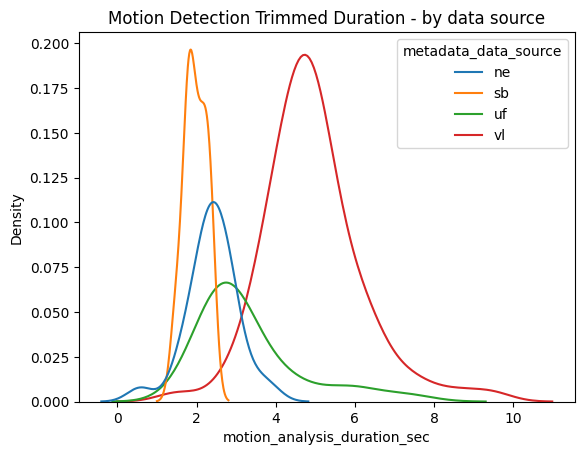

In [37]:
sns.kdeplot(data=analysis_info, x = 'motion_analysis_duration_sec', hue = 'metadata_data_source')
plt.title('Motion Detection Trimmed Duration - by data source')

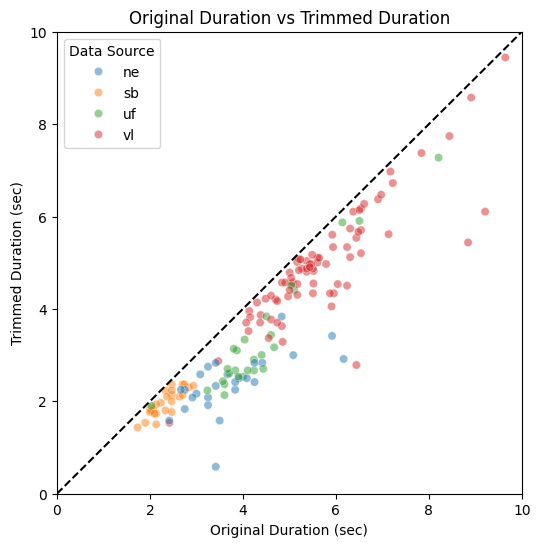

In [38]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'metadata_duration_sec', y = 'motion_analysis_duration_sec', data = analysis_info, hue = 'metadata_data_source', alpha = 0.5)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.plot([0, 10], [0, 10], 'k--')
plt.xlabel('Original Duration (sec)')
plt.ylabel('Trimmed Duration (sec)')
plt.title('Original Duration vs Trimmed Duration')
plt.legend(title='Data Source')
plt.show()


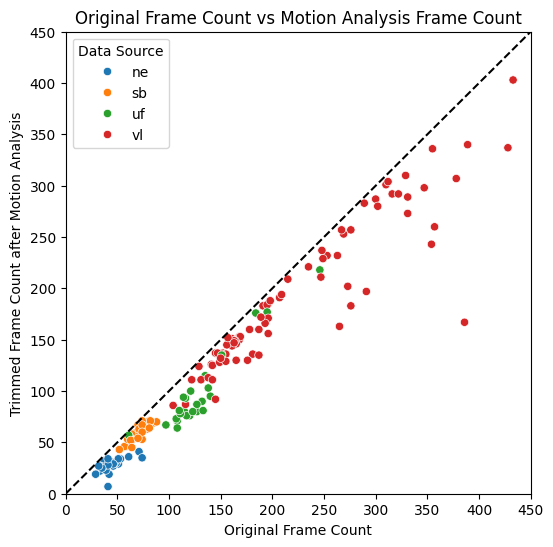

In [39]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x = 'metadata_frame_count', y = 'motion_analysis_duration_frames', data = analysis_info, hue = 'metadata_data_source')
plt.xlim(0, 450)
plt.ylim(0, 450)
plt.plot([0, 450], [0, 450], 'k--')
plt.xlabel('Original Frame Count')
plt.ylabel('Trimmed Frame Count after Motion Analysis')
plt.title('Original Frame Count vs Motion Analysis Frame Count')
plt.legend(title='Data Source')
plt.show()

## Pose Detection Analysis

### Plot Key Reference Points

Looking at the key reference points currently used for the horizontal alignment, the vertical alignment, and the scale adjustment

I decided to use the median of the reference points after investigating the distribution of the reference points, you can see that in the next sections

In [51]:
key_points_analysis_info = analysis_info[[
    'metadata_filename',
    'metadata_data_source',
    'pose_analysis_horizontal_offsets_face_median',
    'pose_analysis_vertical_offsets_face_median',
    'pose_analysis_landmark_measurements_face_width_median',
    'pose_analysis_landmark_measurements_face_height_median',
    'pose_analysis_horizontal_offsets_shoulders_median',
    'pose_analysis_vertical_offsets_shoulders_median',
    'pose_analysis_landmark_measurements_shoulder_width_median',
]].reset_index(drop=True)
key_points_analysis_info.head()

,metadata_filename,metadata_data_source,pose_analysis_horizontal_offsets_face_median,pose_analysis_vertical_offsets_face_median,pose_analysis_landmark_measurements_face_width_median,pose_analysis_landmark_measurements_face_height_median,pose_analysis_horizontal_offsets_shoulders_median,pose_analysis_vertical_offsets_shoulders_median,pose_analysis_landmark_measurements_shoulder_width_median
0,ajudar_ne_1.mp4,ne,0.465408,0.258619,0.145804,0.246427,0.486479,0.541060,0.322242
1,ajudar_sb_2.mp4,sb,0.496422,0.319177,0.089673,0.186765,0.496549,0.520683,0.194269
2,ajudar_uf_3.mp4,uf,0.493168,0.379761,0.090457,0.195808,0.491493,0.585544,0.203528
3,ajudar_vl_4.mp4,vl,0.493951,0.227329,0.099749,0.215714,0.507120,0.454691,0.196968
4,ajudar_vl_5.mp4,vl,0.502303,0.310686,0.122047,0.239237,0.497635,0.555395,0.236184


In [59]:
# Create a table of min/max values for each key point
data = []
for col in key_points_analysis_info.columns[2:]:
    max_idx = key_points_analysis_info[col].idxmax()
    min_idx = key_points_analysis_info[col].idxmin()
    max_row = key_points_analysis_info.iloc[max_idx]
    min_row = key_points_analysis_info.iloc[min_idx]
    
    data.append({
        'Metric': col,
        'Max_Value': f"{max_row[col]:.3f}",
        'Max_File': max_row['metadata_filename'],
        'Min_Value': f"{min_row[col]:.3f}", 
        'Min_File': min_row['metadata_filename']
    })

min_max_df = pd.DataFrame(data)
display(min_max_df.style.set_properties(**{'text-align': 'left'})
        .set_table_styles([dict(selector='th', props=[('text-align', 'left')])]))


,Metric,Max_Value,Max_File,Min_Value,Min_File
0,pose_analysis_horizontal_offsets_face_median,0.569,sorvete_ne_1.mp4,0.416,pai_vl_4.mp4
1,pose_analysis_vertical_offsets_face_median,0.406,vagina_ne_1.mp4,0.095,garganta_vl_4.mp4
2,pose_analysis_landmark_measurements_face_width_median,0.179,família_ne_1.mp4,0.067,sopa_uf_3.mp4
3,pose_analysis_landmark_measurements_face_height_median,0.305,homem_sb_2.mp4,0.148,café_uf_3.mp4
4,pose_analysis_horizontal_offsets_shoulders_median,0.575,sopa_ne_1.mp4,0.429,carne_vl_6.mp4
5,pose_analysis_vertical_offsets_shoulders_median,0.684,vagina_ne_1.mp4,0.390,casa_uf_3.mp4
6,pose_analysis_landmark_measurements_shoulder_width_median,0.401,filho_ne_1.mp4,0.152,casa_uf_3.mp4


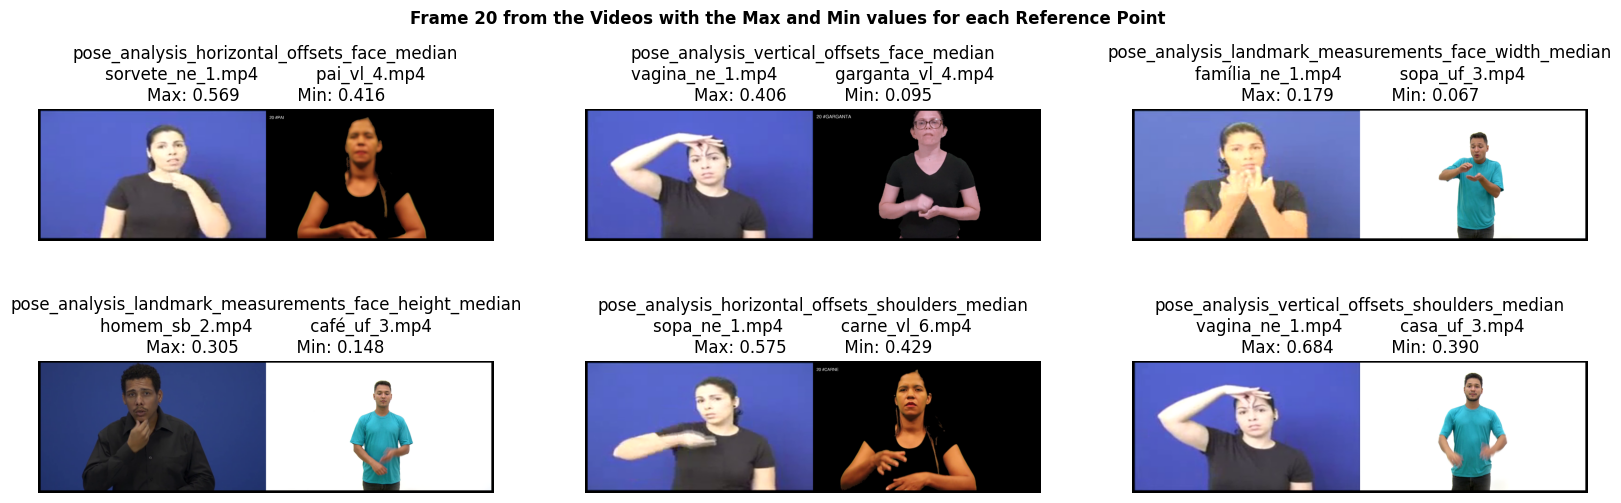

In [103]:
frame_index = 20
# 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 6))
video_path = path_to_root + '/data/raw/combined/videos/'

for ax, (i, row) in zip(axs.flatten(), min_max_df.iterrows()):
    max_frame = viz.get_frame(frame_index, video_path + row['Max_File'])
    min_frame = viz.get_frame(frame_index, video_path + row['Min_File'])
    # resize and hstack
    height = 480
    max_frame = cv2.resize(max_frame, (int(height * 16 / 9), height))
    min_frame = cv2.resize(min_frame, (int(height * 16 / 9), height))
    combined_frame = np.hstack((max_frame, min_frame))
    combined_frame = cv2.copyMakeBorder(combined_frame, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0,0,0))
    ax.imshow(combined_frame)
    ax.set_title(f"{row['Metric']}\n{row['Max_File']}           {row['Min_File']}\nMax: {row['Max_Value']}           Min: {row['Min_Value']}")
    ax.axis('off')

plt.suptitle(f'Frame {frame_index} from the Videos with the Max and Min values for each Reference Point', fontweight = 'bold')
plt.show()

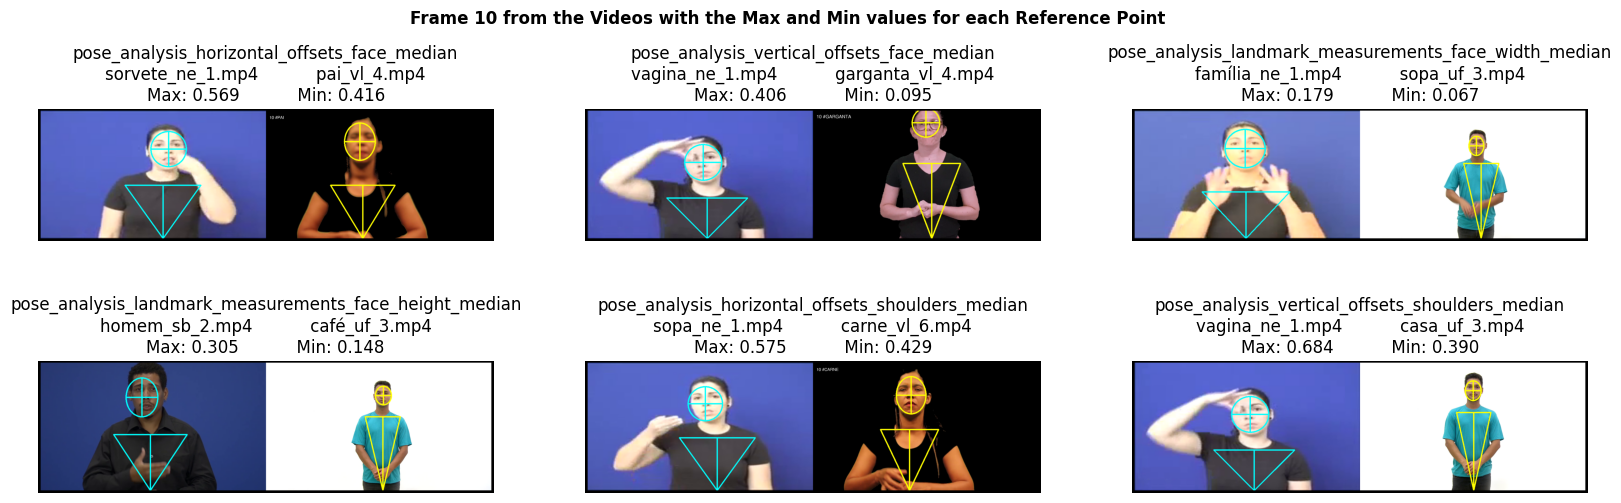

In [133]:
frame_index = 10
# 6 subplots
fig, axs = plt.subplots(2, 3, figsize=(20, 6))
video_path = path_to_root + '/data/raw/combined/videos/'

for ax, (i, row) in zip(axs.flatten(), min_max_df.iterrows()):
    max_frame = viz.get_frame(frame_index, video_path + row['Max_File'])
    min_frame = viz.get_frame(frame_index, video_path + row['Min_File'])
    # resize and hstack
    height = 480
    max_frame = cv2.resize(max_frame, (int(height * 16 / 9), height))
    min_frame = cv2.resize(min_frame, (int(height * 16 / 9), height))

    max_key_points = {
    'face_horizontal_offset': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_horizontal_offsets_face_median'],
    'face_vertical_offset': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_vertical_offsets_face_median'],
    'face_width': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_landmark_measurements_face_width_median'],
    'face_height': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_landmark_measurements_face_height_median'],
    'shoulders_horizontal_offset': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_horizontal_offsets_shoulders_median'],
    'shoulders_vertical_offset': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_vertical_offsets_shoulders_median'],
    'shoulders_width': analysis_info[analysis_info['metadata_filename'] == row['Max_File']]['pose_analysis_landmark_measurements_shoulder_width_median'],
    }
    min_key_points = {
    'face_horizontal_offset': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_horizontal_offsets_face_median'],
    'face_vertical_offset': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_vertical_offsets_face_median'],
    'face_width': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_landmark_measurements_face_width_median'],
    'face_height': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_landmark_measurements_face_height_median'],
    'shoulders_horizontal_offset': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_horizontal_offsets_shoulders_median'],
    'shoulders_vertical_offset': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_vertical_offsets_shoulders_median'],
    'shoulders_width': analysis_info[analysis_info['metadata_filename'] == row['Min_File']]['pose_analysis_landmark_measurements_shoulder_width_median'],
    }

    max_frame = viz.plot_key_landmarks(max_key_points, max_frame, (0, 255, 255), triangle=True, line_width=3)
    min_frame = viz.plot_key_landmarks(min_key_points, min_frame, (255, 255, 0), triangle=True, line_width=3)

    combined_frame = np.hstack((max_frame, min_frame))
    combined_frame = cv2.copyMakeBorder(combined_frame, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(0,0,0))
    ax.imshow(combined_frame)
    ax.set_title(f"{row['Metric']}\n{row['Max_File']}           {row['Min_File']}\nMax: {row['Max_Value']}           Min: {row['Min_Value']}")
    ax.axis('off')

plt.suptitle(f'Frame {frame_index} from the Videos with the Max and Min values for each Reference Point', fontweight = 'bold')
plt.show()

In [85]:
color_dict = {
    'ne': (0, 125, 255), # blue
    'vl': (0, 255, 0), # green
    'sb': (255, 0, 0), # red
    'uf': (255, 255, 0), # yellow
}

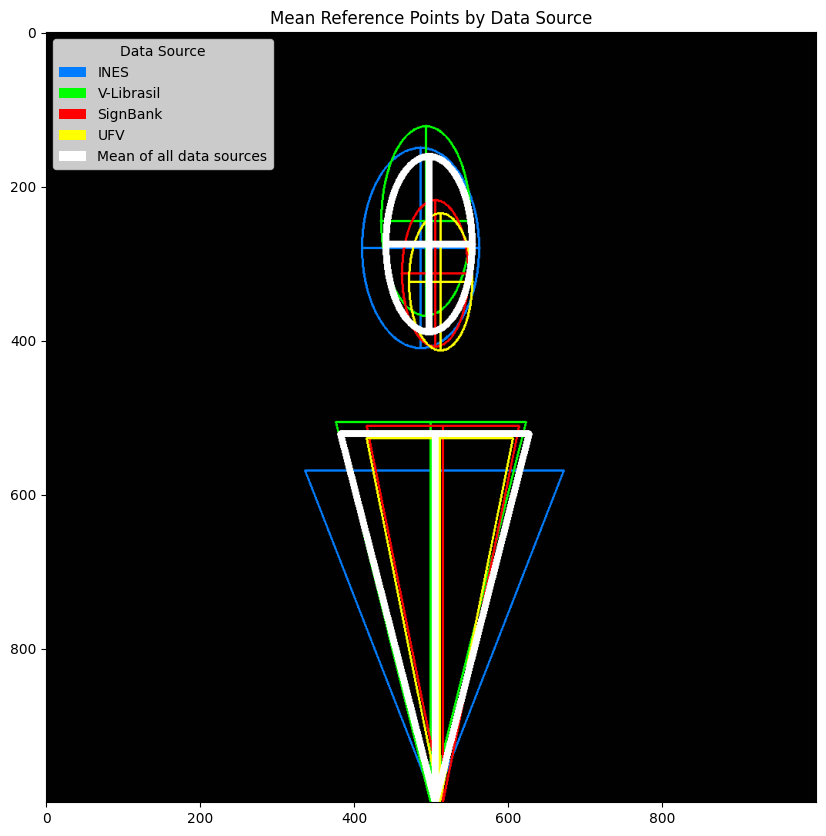

In [92]:
# get the mean of the reference points for each data source
ref_points_by_data_source = {}
for data_source in ['ne', 'vl', 'sb', 'uf']:
    ref_points_by_data_source[data_source] = {
        'face_horizontal_offset': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_horizontal_offsets_face_median'].mean(),
        'face_vertical_offset': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_vertical_offsets_face_median'].mean(),
        'face_width': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_landmark_measurements_face_width_median'].mean(),
        'face_height': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_landmark_measurements_face_height_median'].mean(),
        'shoulders_horizontal_offset': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_horizontal_offsets_shoulders_median'].mean(),
        'shoulders_vertical_offset': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_vertical_offsets_shoulders_median'].mean(),
        'shoulders_width': analysis_info[
            analysis_info['metadata_data_source'] == data_source
        ]['pose_analysis_landmark_measurements_shoulder_width_median'].mean(),
    }
# get the mean of the reference points for all data sources
mean_ref_points = {
'face_horizontal_offset': analysis_info['pose_analysis_horizontal_offsets_face_median'].mean(),
'face_vertical_offset': analysis_info['pose_analysis_vertical_offsets_face_median'].mean(),
'face_width': analysis_info['pose_analysis_landmark_measurements_face_width_median'].mean(),
'face_height': analysis_info['pose_analysis_landmark_measurements_face_height_median'].mean(),
'shoulders_horizontal_offset': analysis_info['pose_analysis_horizontal_offsets_shoulders_median'].mean(),
'shoulders_vertical_offset': analysis_info['pose_analysis_vertical_offsets_shoulders_median'].mean(),
'shoulders_width': analysis_info['pose_analysis_landmark_measurements_shoulder_width_median'].mean(),
}
# plot the reference points for each data source
canvas_dims = 1000
canvas_ref = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)
for data_source in ref_points_by_data_source.keys():
    canvas_ref = viz.plot_key_landmarks(
        ref_points_by_data_source[data_source], 
        canvas_ref, 
        color_dict[data_source], 
        triangle=True
    )
# plot the mean of the reference points
canvas_ref = viz.plot_key_landmarks(mean_ref_points, canvas_ref, (255, 255, 255), triangle=True, line_width=7)
plt.figure(figsize=(10, 10))
plt.imshow(canvas_ref)
plt.title('Mean Reference Points by Data Source')

# Create custom legend patches
legend_patches = [
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['ne'])),  # blue
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['vl'])),  # green  
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['sb'])),  # red
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['uf'])),  # yellow
    plt.Rectangle((0,0), 1, 1, fc=(1, 1, 1))  # white for mean
]
plt.gca().legend(legend_patches, ['INES', 'V-Librasil', 'SignBank', 'UFV', 'Mean of all data sources'], 
                title='Data Source', loc='upper left')
plt.show()


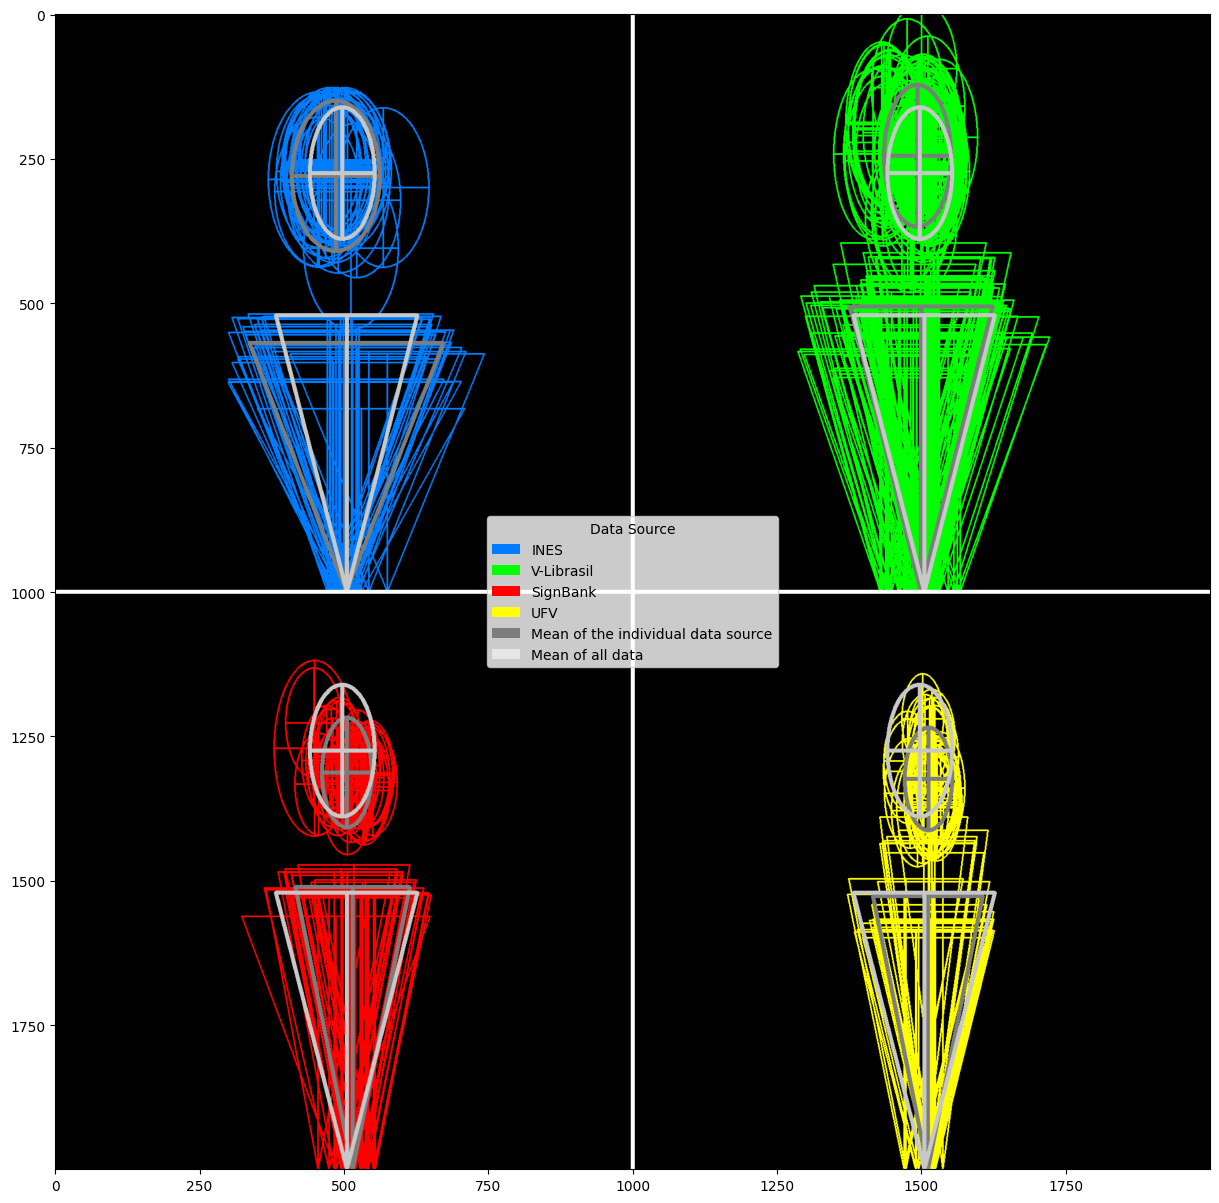

In [118]:
canvas_dims = 1000
canvas_ne = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)
canvas_vl = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)
canvas_sb = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)
canvas_uf = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)

for i, row in analysis_info.iterrows():
    data_source = row['metadata_data_source']
    color = color_dict[data_source]
    key_points = {
    'face_horizontal_offset': row['pose_analysis_horizontal_offsets_face_median'],
    'face_vertical_offset': row['pose_analysis_vertical_offsets_face_median'],
    'face_width': row['pose_analysis_landmark_measurements_face_width_median'],
    'face_height': row['pose_analysis_landmark_measurements_face_height_median'],
    'shoulders_horizontal_offset': row['pose_analysis_horizontal_offsets_shoulders_median'],
    'shoulders_vertical_offset': row['pose_analysis_vertical_offsets_shoulders_median'],
    'shoulders_width': row['pose_analysis_landmark_measurements_shoulder_width_median'],
    }
    if data_source == 'ne':
        canvas_ne = viz.plot_key_landmarks(key_points, canvas_ne, color, triangle=True)
    if data_source == 'vl':
        canvas_vl = viz.plot_key_landmarks(key_points, canvas_vl, color, triangle=True)
    if data_source == 'sb':
        canvas_sb = viz.plot_key_landmarks(key_points, canvas_sb, color, triangle=True)
    if data_source == 'uf':
        canvas_uf = viz.plot_key_landmarks(key_points, canvas_uf, color, triangle=True)
for canvas_datasource, data_source in zip([canvas_ne, canvas_vl, canvas_sb, canvas_uf], ['ne', 'vl', 'sb', 'uf']):
    viz.plot_key_landmarks(ref_points_by_data_source[data_source], canvas_datasource, (125, 125, 125), triangle=True, line_width=5)
    viz.plot_key_landmarks(mean_ref_points, canvas_datasource, (200, 200, 200), triangle=True, line_width=5)
canvas_top = np.hstack((canvas_ne, canvas_vl))
canvas_bottom = np.hstack((canvas_sb, canvas_uf))
canvas = np.vstack((canvas_top, canvas_bottom))
canvas = cv2.line(canvas, (0, canvas_dims), (canvas.shape[1], canvas_dims), (255, 255, 255), 5)
canvas = cv2.line(canvas, (canvas_dims, 0), (canvas_dims, canvas.shape[0]), (255, 255, 255), 5)

plt.figure(figsize=(15, 15))
plt.imshow(canvas)

legend_patches = [
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['ne'])),  # blue
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['vl'])),  # green  
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['sb'])),  # red
    plt.Rectangle((0,0), 1, 1, fc=tuple(x/255 for x in color_dict['uf'])),  # yellow
    plt.Rectangle((0,0), 1, 1, fc=(125/255, 125/255, 125/255)),  # grey for mean of the individual data source
    plt.Rectangle((0,0), 1, 1, fc=(230/255, 230/255, 230/255))  # white for mean of all data
]
plt.gca().legend(legend_patches, ['INES', 'V-Librasil', 'SignBank', 'UFV', 'Mean of the individual data source', 'Mean of all data'], 
                title='Data Source', loc='center')
plt.show()

In [140]:
key_points_analysis_info.drop(['metadata_filename', 'metadata_data_source'], axis=1).mean()

pose_analysis_horizontal_offsets_face_median                 0.497654
pose_analysis_vertical_offsets_face_median                   0.275474
pose_analysis_landmark_measurements_face_width_median        0.112824
pose_analysis_landmark_measurements_face_height_median       0.228390
pose_analysis_horizontal_offsets_shoulders_median            0.505218
pose_analysis_vertical_offsets_shoulders_median              0.521221
pose_analysis_landmark_measurements_shoulder_width_median    0.244556
dtype: float64

Choosing the Reference Points based on the EDA

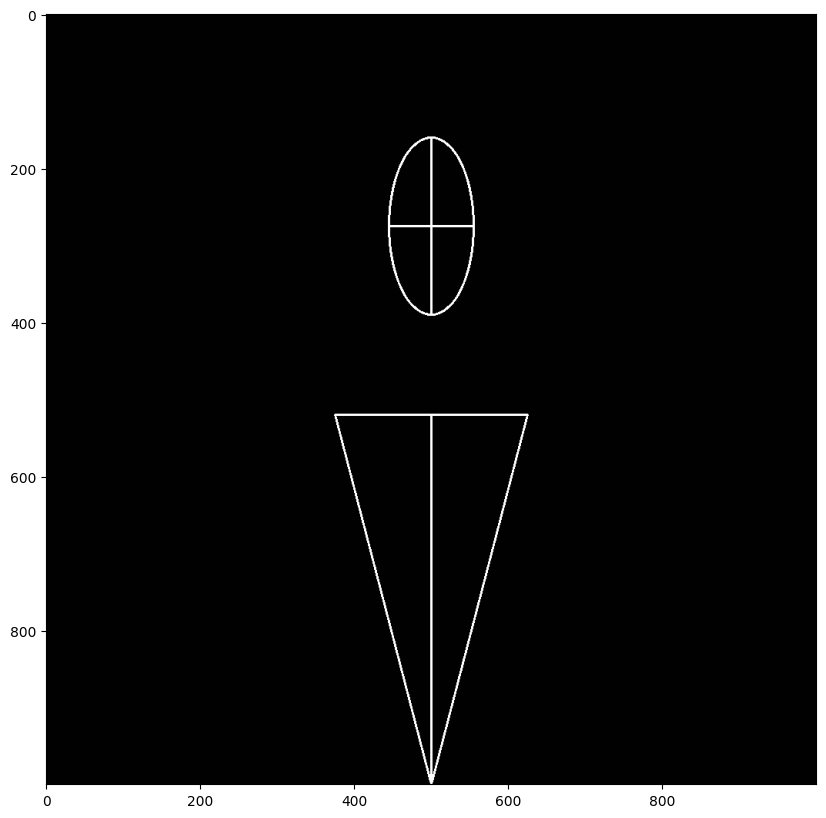

In [141]:
ref_points = {
'face_horizontal_offset': 0.5,
'face_vertical_offset': 0.275,
'face_width': 0.11,
'face_height': 0.23,
'shoulders_horizontal_offset': 0.5,
'shoulders_vertical_offset': 0.52,
'shoulders_width': 0.25,
}
canvas_dims = 1000
canvas_ref = np.ones((canvas_dims, canvas_dims, 3), dtype=np.uint8)
canvas_ref = viz.plot_key_landmarks(ref_points, canvas_ref, (255, 255, 255), triangle=True)
plt.figure(figsize=(10, 10))
plt.imshow(canvas_ref)

### Horizontal Offset

Text(0.5, 1.0, 'Horizontal Offset of Face - by method')

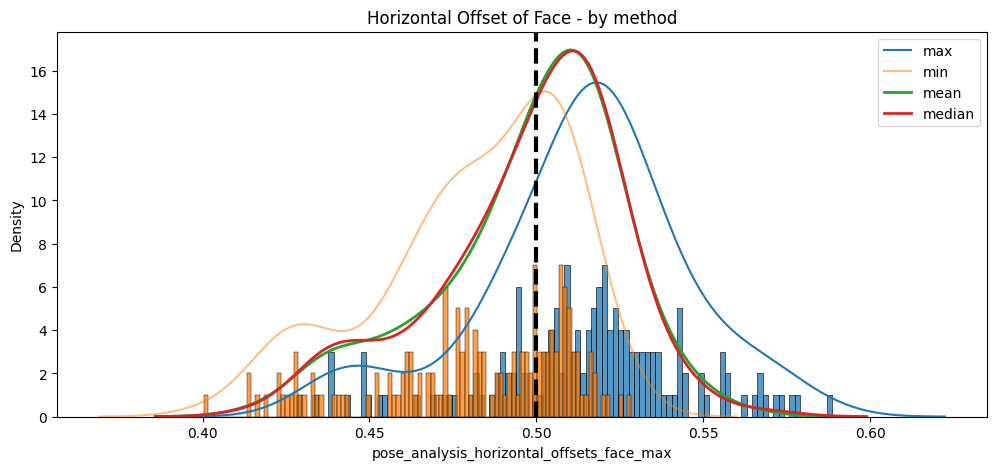

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_max)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_min, alpha = 0.5)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_face_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_face_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')
plt.title('Horizontal Offset of Face - by method')

Text(0.5, 1.0, 'Horizontal Offset of Shoulders - by method')

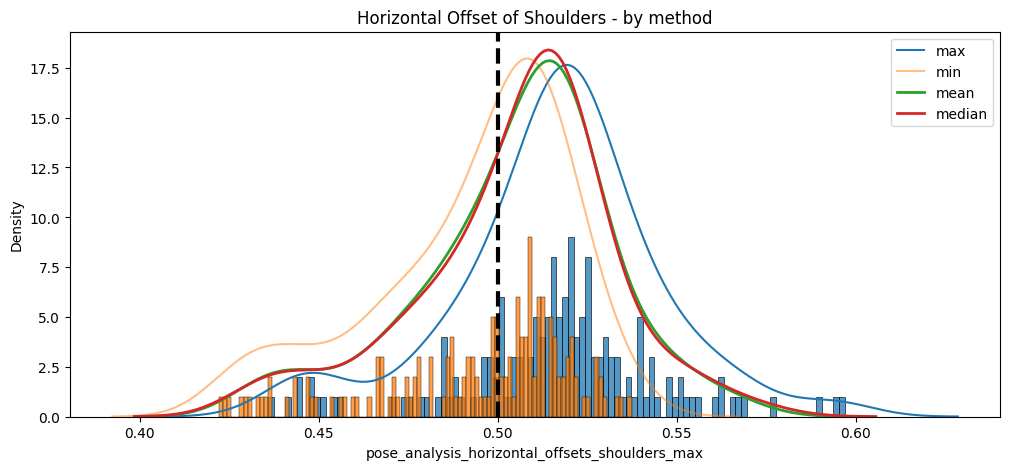

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_max)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_min, alpha = 0.5)
sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_horizontal_offsets_shoulders_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')
plt.title('Horizontal Offset of Shoulders - by method')

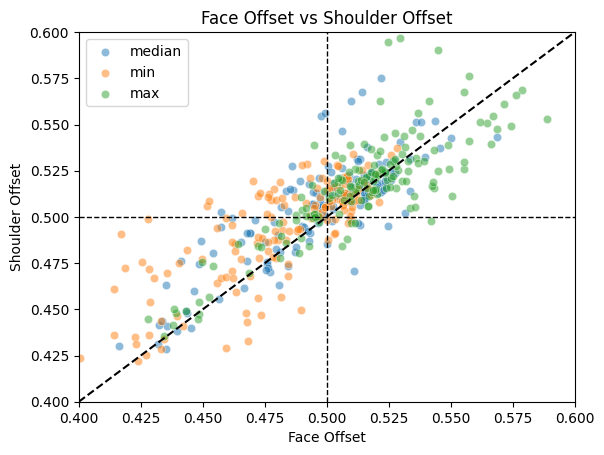

In [ ]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_min, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_min, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_max, y = analysis_info.pose_analysis_horizontal_offsets_shoulders_max, alpha = 0.5)
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.plot([0.4, 0.6], [0.4, 0.6], 'k--')
plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.legend(['median', 'min', 'max'])
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.axhline(0.5, color = 'k', linewidth = 1, linestyle = '--')

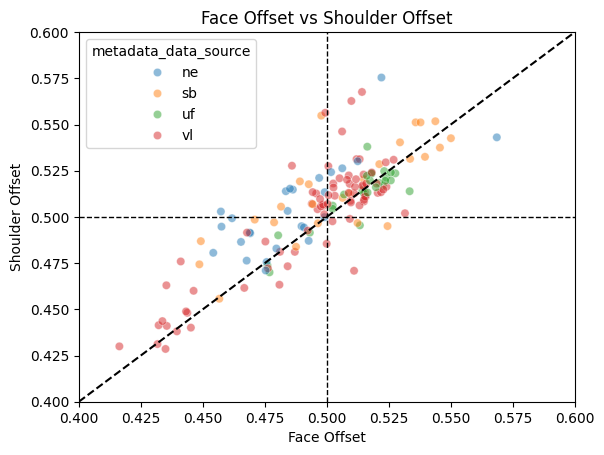

In [ ]:
sns.scatterplot(x = 'pose_analysis_horizontal_offsets_face_median', y = 'pose_analysis_horizontal_offsets_shoulders_median', data = analysis_info, hue = 'metadata_data_source', alpha = 0.5)
plt.xlim(0.4, 0.6)
plt.ylim(0.4, 0.6)
plt.plot([0.4, 0.6], [0.4, 0.6], 'k--')
plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.axhline(0.5, color = 'k', linewidth = 1, linestyle = '--')

Text(0.5, 1.0, 'Median Horizontal Offset of Face by Data Source')

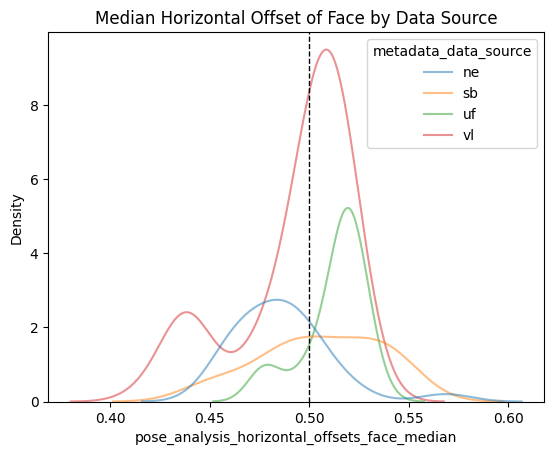

In [ ]:
sns.kdeplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_face_median', hue = 'metadata_data_source', alpha = 0.5)
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.title('Median Horizontal Offset of Face by Data Source')

Text(0.5, 1.0, 'MedianHorizontal Offset of Shoulders by Data Source')

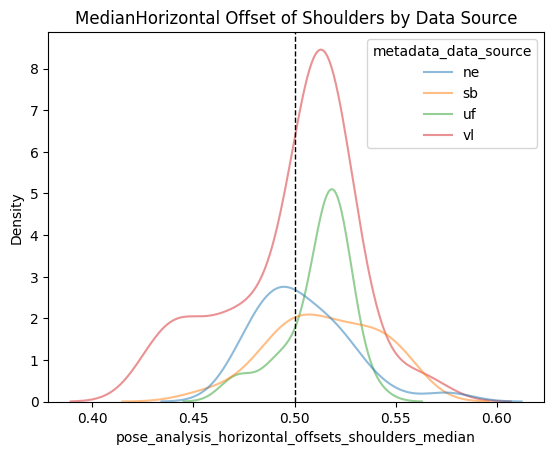

In [ ]:
sns.kdeplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_shoulders_median', hue = 'metadata_data_source', alpha = 0.5)
plt.axvline(0.5, color = 'k', linewidth = 1, linestyle = '--')
plt.title('MedianHorizontal Offset of Shoulders by Data Source')

### Vertical Offset

Text(0.5, 1.0, 'Vertical Offset of Face - by method')

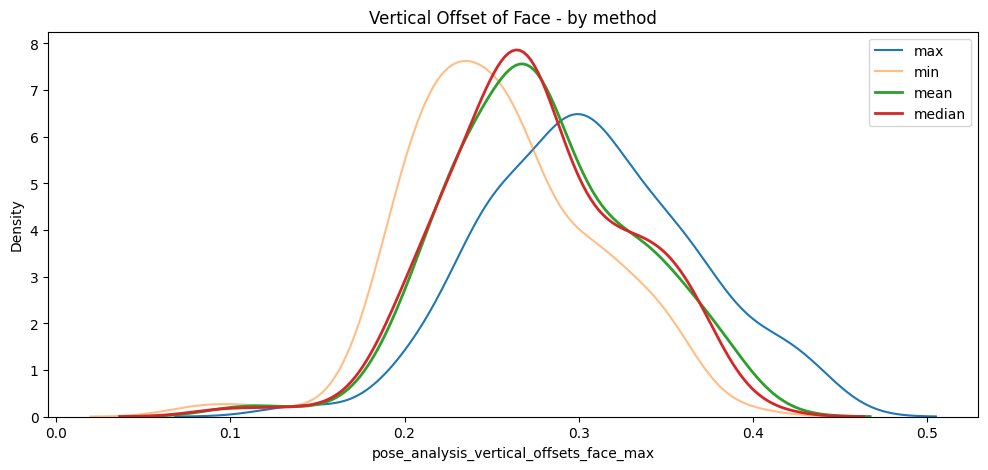

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_max)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_min, alpha = 0.5)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_face_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_face_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
# plt.axvline(0.5, color = 'k', linewidth = 3, linestyle = '--')
plt.title('Vertical Offset of Face - by method')

Text(0.5, 1.0, 'Vertical Offset of Shoulders - by method')

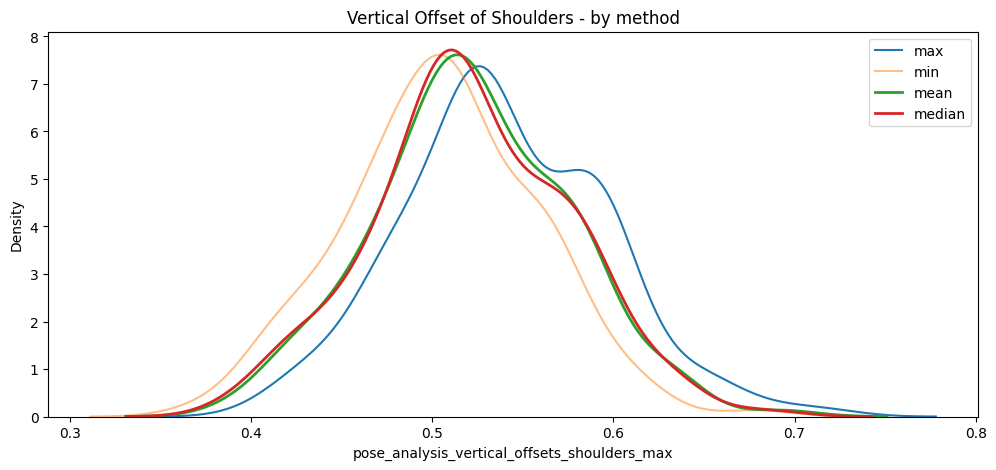

In [ ]:
plt.figure(figsize=(12, 5))
sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_max)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_max, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_min, alpha = 0.5)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_min, bins=100)

sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_mean, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_mean, bins=100)


sns.kdeplot(analysis_info.pose_analysis_vertical_offsets_shoulders_median, linewidth = 2)
# sns.histplot(analysis_info.pose_analysis_vertical_offsets_shoulders_median, bins=100)
#
plt.legend(['max', 'min', 'mean', 'median'])
plt.title('Vertical Offset of Shoulders - by method')

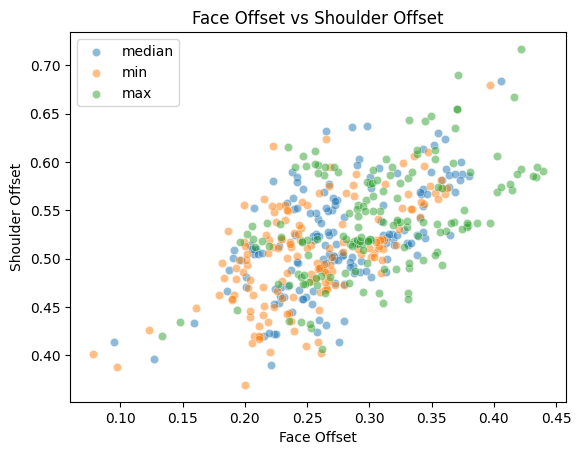

In [ ]:
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_min, y = analysis_info.pose_analysis_vertical_offsets_shoulders_min, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_vertical_offsets_face_max, y = analysis_info.pose_analysis_vertical_offsets_shoulders_max, alpha = 0.5)

plt.xlabel('Face Offset')
plt.ylabel('Shoulder Offset')
plt.title('Face Offset vs Shoulder Offset')
plt.legend(['median', 'min', 'max'])

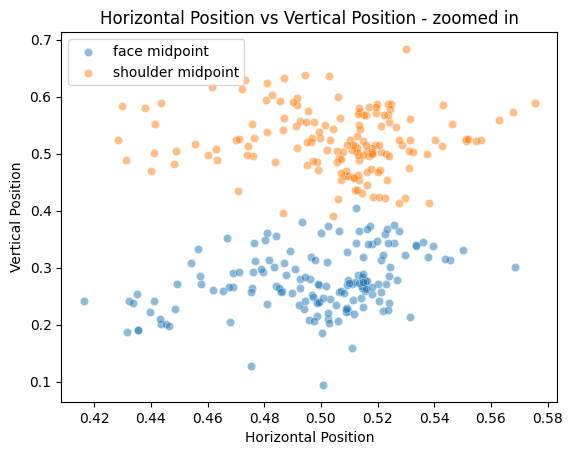

In [ ]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_face_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)

plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position - zoomed in')
plt.legend(['face midpoint', 'shoulder midpoint'])

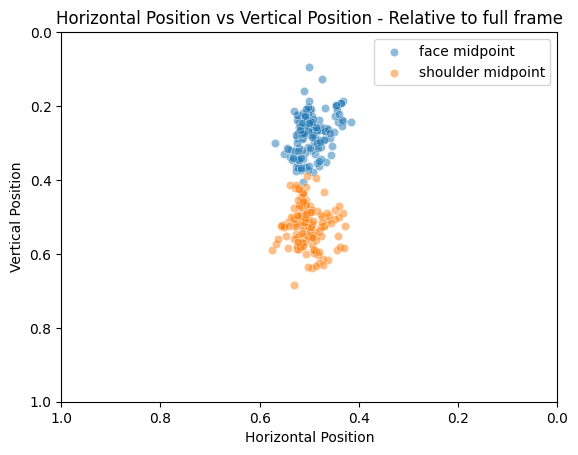

In [ ]:
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_face_median, y = analysis_info.pose_analysis_vertical_offsets_face_median, alpha = 0.5)
sns.scatterplot(x = analysis_info.pose_analysis_horizontal_offsets_shoulders_median, y = analysis_info.pose_analysis_vertical_offsets_shoulders_median, alpha = 0.5)
plt.xlim(1, 0)
plt.ylim(1, 0)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position - Relative to full frame')
plt.legend(['face midpoint', 'shoulder midpoint'])

Text(0.5, 1.0, 'Horizontal Position vs Vertical Position\n-Face and Shoulder Midpoints\n-by data source\n-relative to full frame')

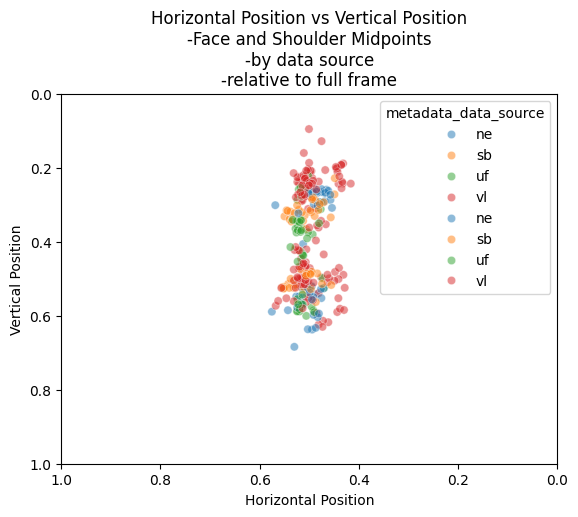

In [ ]:
sns.scatterplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_face_median', y = 'pose_analysis_vertical_offsets_face_median', alpha = 0.5, hue = 'metadata_data_source')
sns.scatterplot(data = analysis_info, x = 'pose_analysis_horizontal_offsets_shoulders_median', y = 'pose_analysis_vertical_offsets_shoulders_median', alpha = 0.5, hue = 'metadata_data_source')
plt.xlim(1, 0)
plt.ylim(1, 0)
plt.xlabel('Horizontal Position')
plt.ylabel('Vertical Position')
plt.title('Horizontal Position vs Vertical Position\n-Face and Shoulder Midpoints\n-by data source\n-relative to full frame')